# Test

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [19]:
from learn import *
sys.path.insert(0, 'code')
from v17 import *
from v17 import _internal_validate_predict_best_param
sys.path.insert(0, 'Pytorch-UNet/utils')
from crf import dense_crf

In [3]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 6
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [4,5,8,9]
torch.cuda.set_device(gpu_start)
bs = 8

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[2]

## Scripting

Status: not evaled, not ploted

In [3]:
%%time
%run script 2 --num_gpus=1 --gpu_start=9 --bs=80 --pred --eval --num_slice 25 --model_name unet


Data finished loading: data/train/AOI_4_Shanghai_Train


0.4 0.258248
0.4444444444444445 0.270585
0.48888888888888893 0.281608
0.5333333333333333 0.290042
0.5777777777777778 0.296375
0.6222222222222222 0.305624
0.6666666666666667 0.311549
0.7111111111111111 0.317498
0.7555555555555555 0.317631
0.8 0.307543

CPU times: user 9h 31min 4s, sys: 48min 59s, total: 10h 20min 4s
Wall time: 2h 44min 21s


In [4]:
fscores, prs

((0.258248,
  0.270585,
  0.281608,
  0.290042,
  0.296375,
  0.305624,
  0.311549,
  0.317498,
  0.317631,
  0.307543),
 ((0.253347, 0.263343),
  (0.267057, 0.274209),
  (0.279832, 0.283406),
  (0.288126, 0.291984),
  (0.294686, 0.298084),
  (0.30464, 0.306615),
  (0.310957, 0.312143),
  (0.317612, 0.317385),
  (0.316504, 0.318767),
  (0.304575, 0.31057)))

With more granularity on threshold at 0.65-0.8

In [1]:
%%time
%run script 2 --num_gpus=1 --gpu_start=9 --bs=80 --pred --eval --num_slice 25 --model_name unet


Data finished loading: data/train/AOI_4_Shanghai_Train


0.65 0.315098
0.6666666666666667 0.317948
0.6833333333333333 0.319794
0.7000000000000001 0.321898
0.7166666666666667 0.322073
0.7333333333333334 0.322354
0.75 0.322138
0.7666666666666667 0.319973
0.7833333333333334 0.318154
0.8 0.309834

CPU times: user 12h 56s, sys: 1h 9min 39s, total: 13h 10min 35s
Wall time: 2h 49min 41s


# Without rescale

In [3]:
fscores, prs = evalfscore(datapath, [preds_1], [], debug=args.debug, num_slice=num_slice)

1375


0.2 0.234993
0.2571428571428572 0.190561
0.3142857142857143 0.149868
0.37142857142857144 0.109335
0.4285714285714286 0.078392
0.4857142857142857 0.057218
0.5428571428571429 0.040659
0.6 0.026452



In [ ]:
# rerun with lower beginningthresh
fscores, prs = evalfscore(datapath, [preds_1], [], debug=args.debug, num_slice=25)

1375


0.2 0.234993


In [21]:
prs

((0.001528, 0.001096),
 (0.001141, 0.000715),
 (0.000799, 0.000429),
 (0.001033, 0.000477),
 (0.00085, 0.000334),
 (0.000417, 0.000191),
 (0.000962, 0.000286),
 (0.000738, 0.000191))

0.15 0.285962


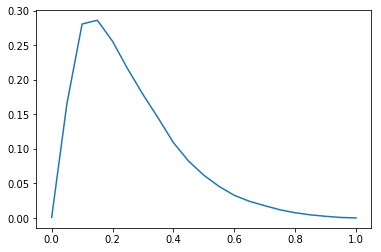

In [7]:
plt.plot(threshs, fscore)
plt.xlabel = 'threshold'
plt.ylabel = 'fscore'
print(np.argmax(fscore) / 20, fscore[np.argmax(fscore)])

In [ ]:
fscore = [o[0] for o in polygon_pr]

plt.plot(threshs, fscore)
plt.xlabel = 'threshold'
plt.ylabel = 'fscore'
print(np.argmax(fscore) / 20, fscore[np.argmax(fscore)])

## evalfscore

In [6]:
scores = None

In [7]:
(trn_x,trn_y), (val_x,val_y) = data
x, y = val_x, val_y[...,0]
pt = T(y_pred)
yt = T(y)

In [ ]:
scores, idx = plot_worse_preds(x, yt, pt, jaccard_coef_loss, scores=scores, shift=50,
                          n_ims=100, is_best=True, thresh=0.7)

[0.71963 0.71939 0.71745 0.71524 0.71234 0.71162 0.71149 0.71145 0.7108  0.70892 0.7078  0.70761 0.70548
 0.70502 0.70481 0.70448 0.7005  0.70049 0.6999  0.69967 0.69892 0.69807 0.69763 0.69749 0.6967  0.69244
 0.69138 0.69071 0.69051 0.69013 0.68888 0.68784 0.68711 0.68502 0.68456 0.68086 0.6754  0.67237 0.66749
 0.66739 0.66712 0.66631 0.66564 0.66554 0.66479 0.66469 0.66469 0.66395 0.66103 0.66082 0.65995 0.6597
 0.65836 0.65519 0.655   0.65169 0.65153 0.64976 0.64939 0.64794 0.64713 0.64698 0.64393 0.64333 0.6425
 0.64247 0.64246 0.64239 0.64142 0.64122 0.64041 0.64028 0.63854 0.63789 0.63776 0.63734 0.63606 0.63496
 0.63485 0.63476 0.63077 0.63043 0.62931 0.62734 0.62563 0.62544 0.62428 0.62295 0.62203 0.62143 0.62131
 0.6213  0.62049 0.61873 0.61831 0.6167  0.61567 0.61553 0.61393 0.6133 ]


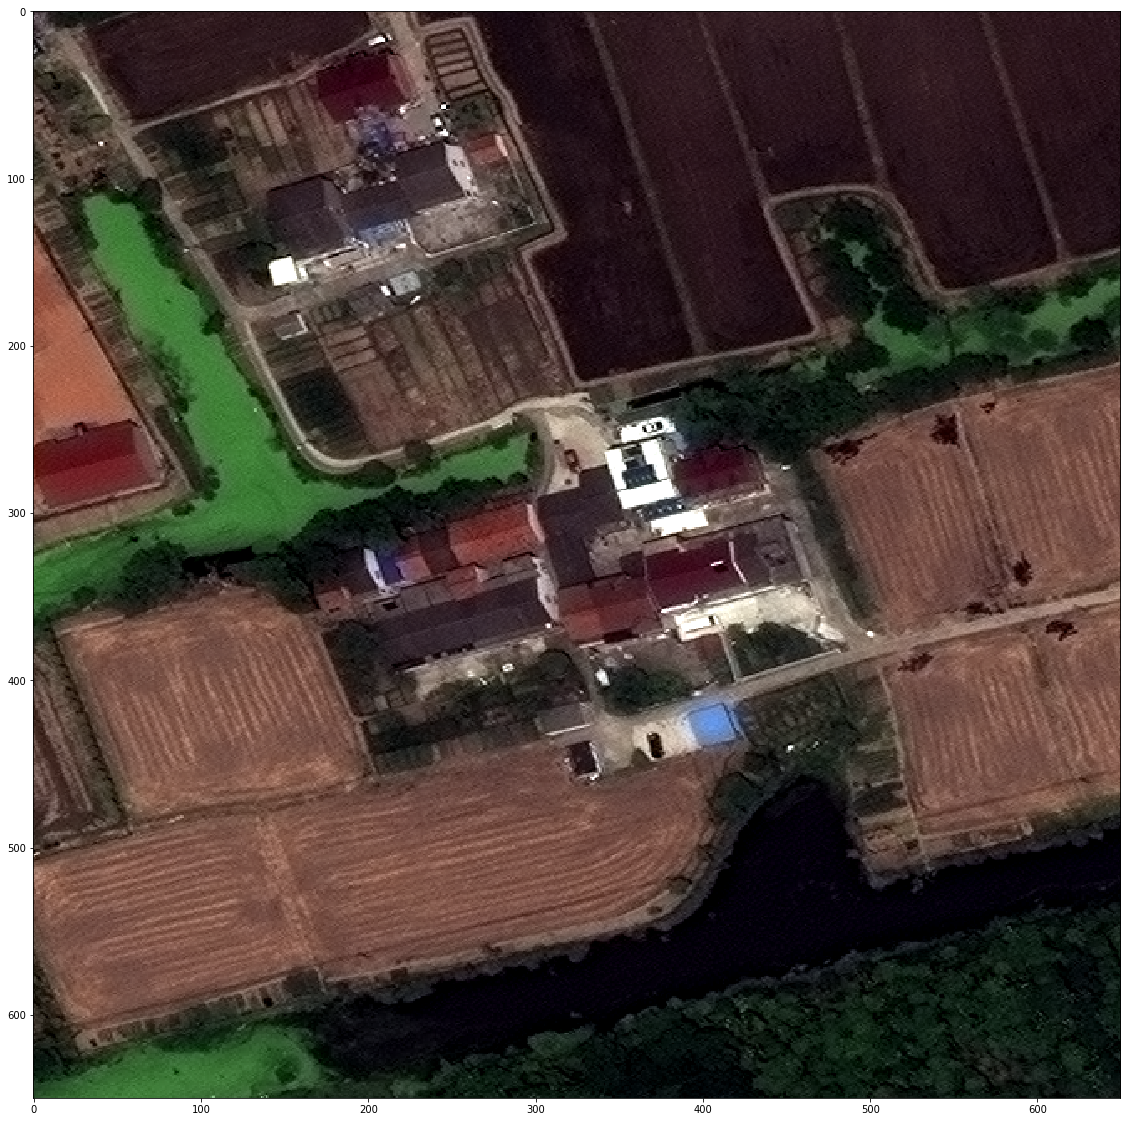

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(val_x[119])

In [6]:
num_slice = 81
area_id = 5
(trn_x,trn_y), (val_x,val_y) = data

# avg = _internal_validate_predict_best_param(area_id, slice_pred_list=[preds_1], rescale_pred_list=[preds_rescale],
#                                             num_slice=num_slice)
slice_only = _internal_validate_predict_best_param(area_id, slice_pred_list=[preds_1], num_slice=25)
# rescale_only = _internal_validate_predict_best_param(area_id, rescale_pred_list=[preds_rescale], num_slice=num_slice)
x_big = val_x
y_big = val_y
# avg.shape

304


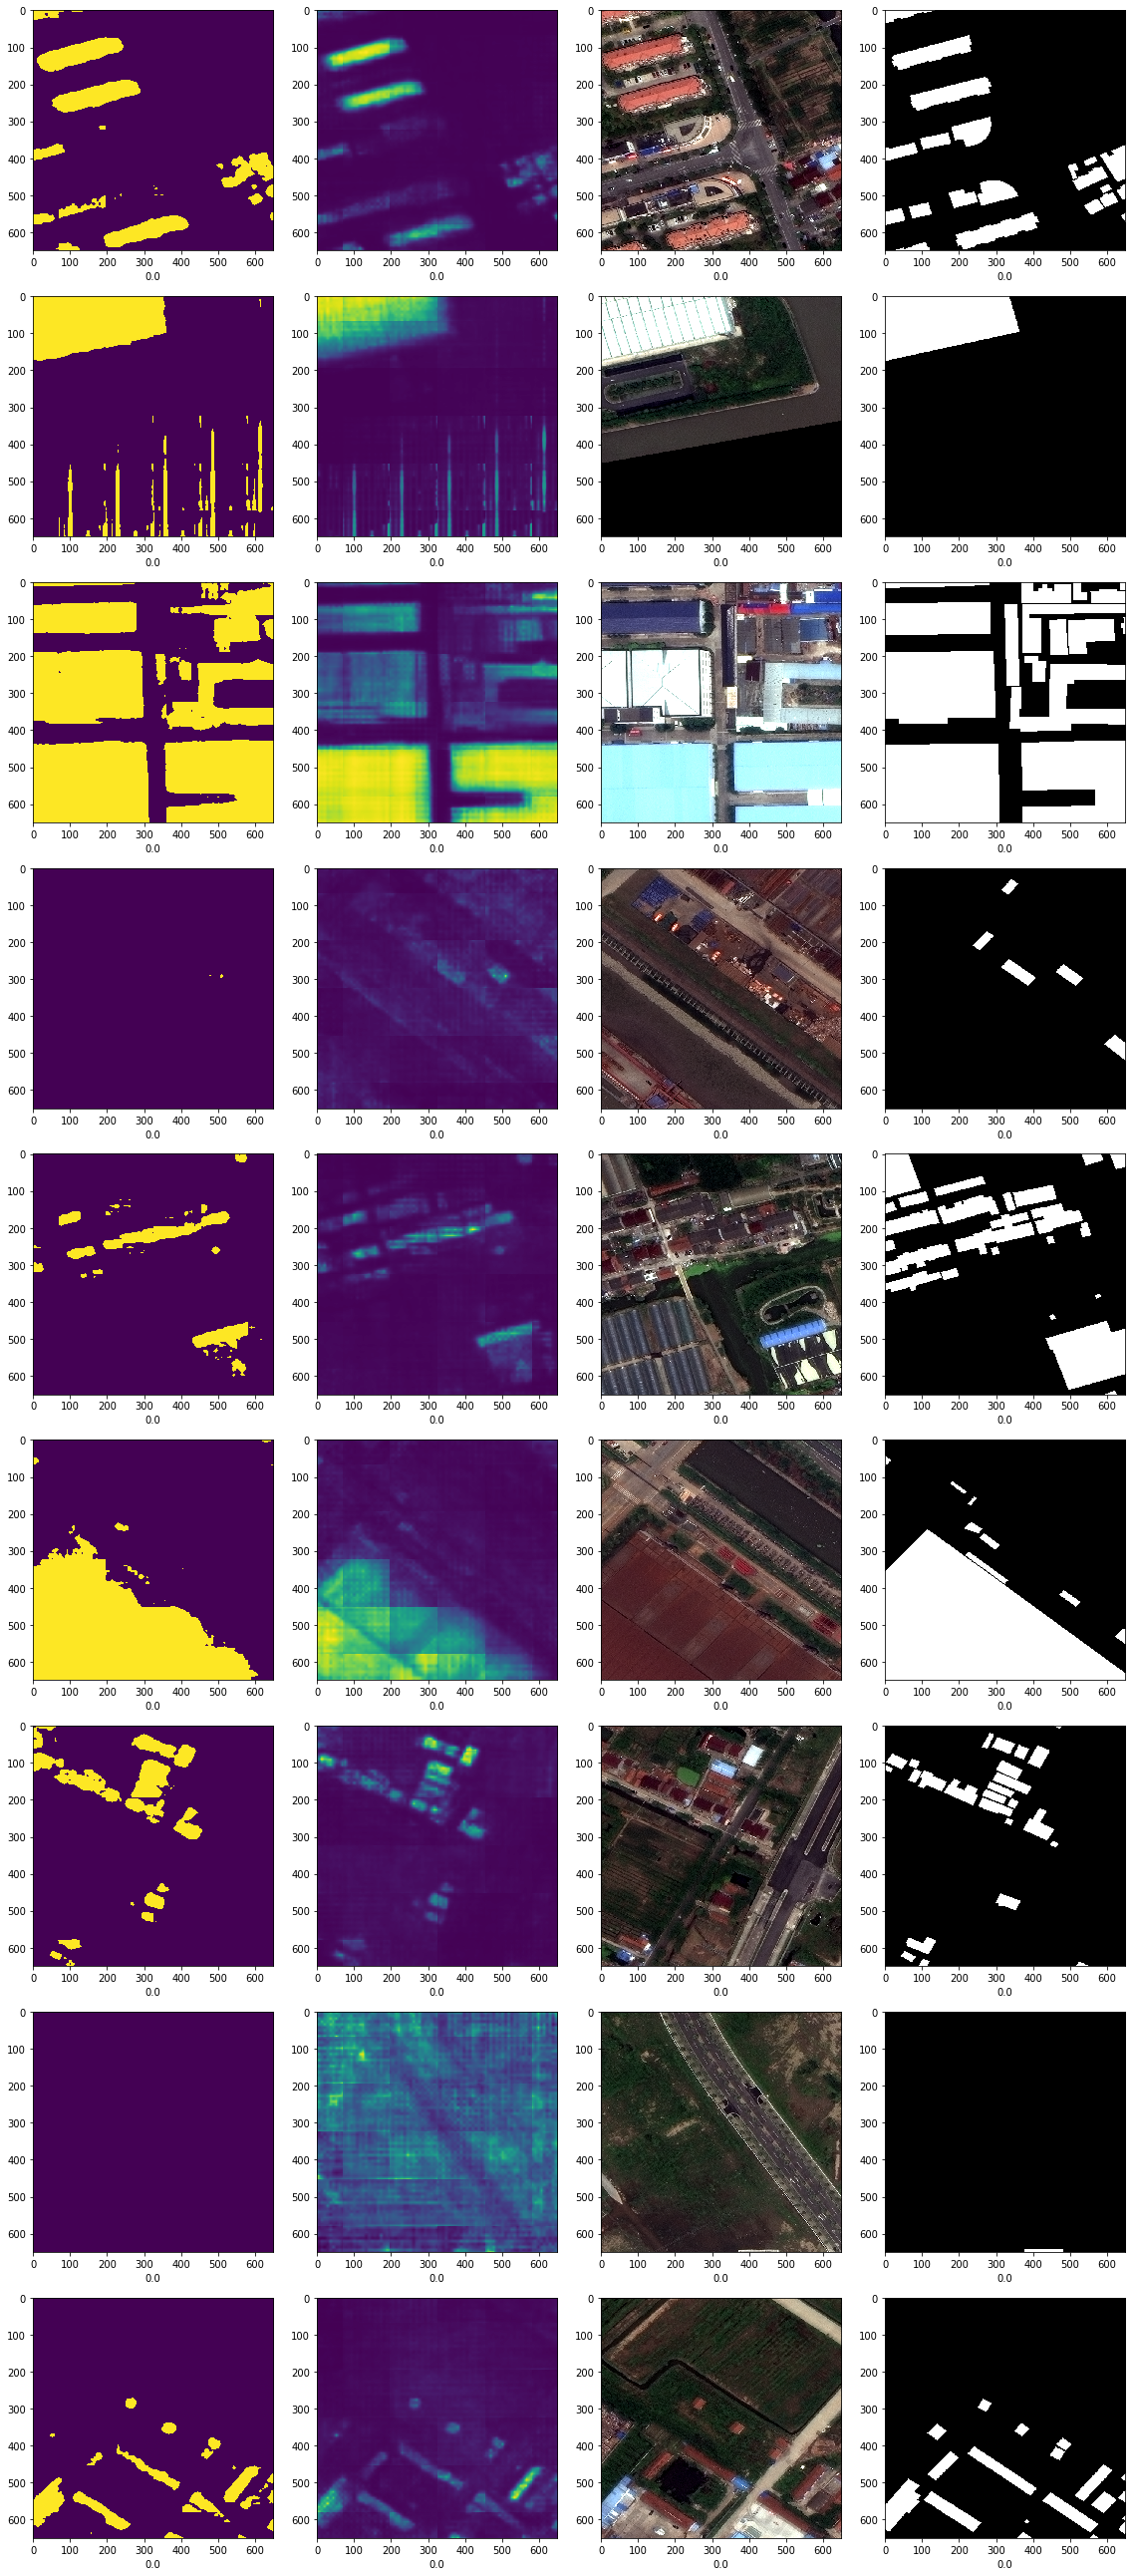

In [12]:
idx = 109
num_ims = 9
data_im = zip(slice_only[idx:idx + num_ims] > 0.1, slice_only[idx:idx + num_ims], val_x[idx:idx + num_ims], val_y[idx:idx + num_ims])
# data_im = [avg[idx:idx + 9]]
plot_ims(data_im, figsize=4)

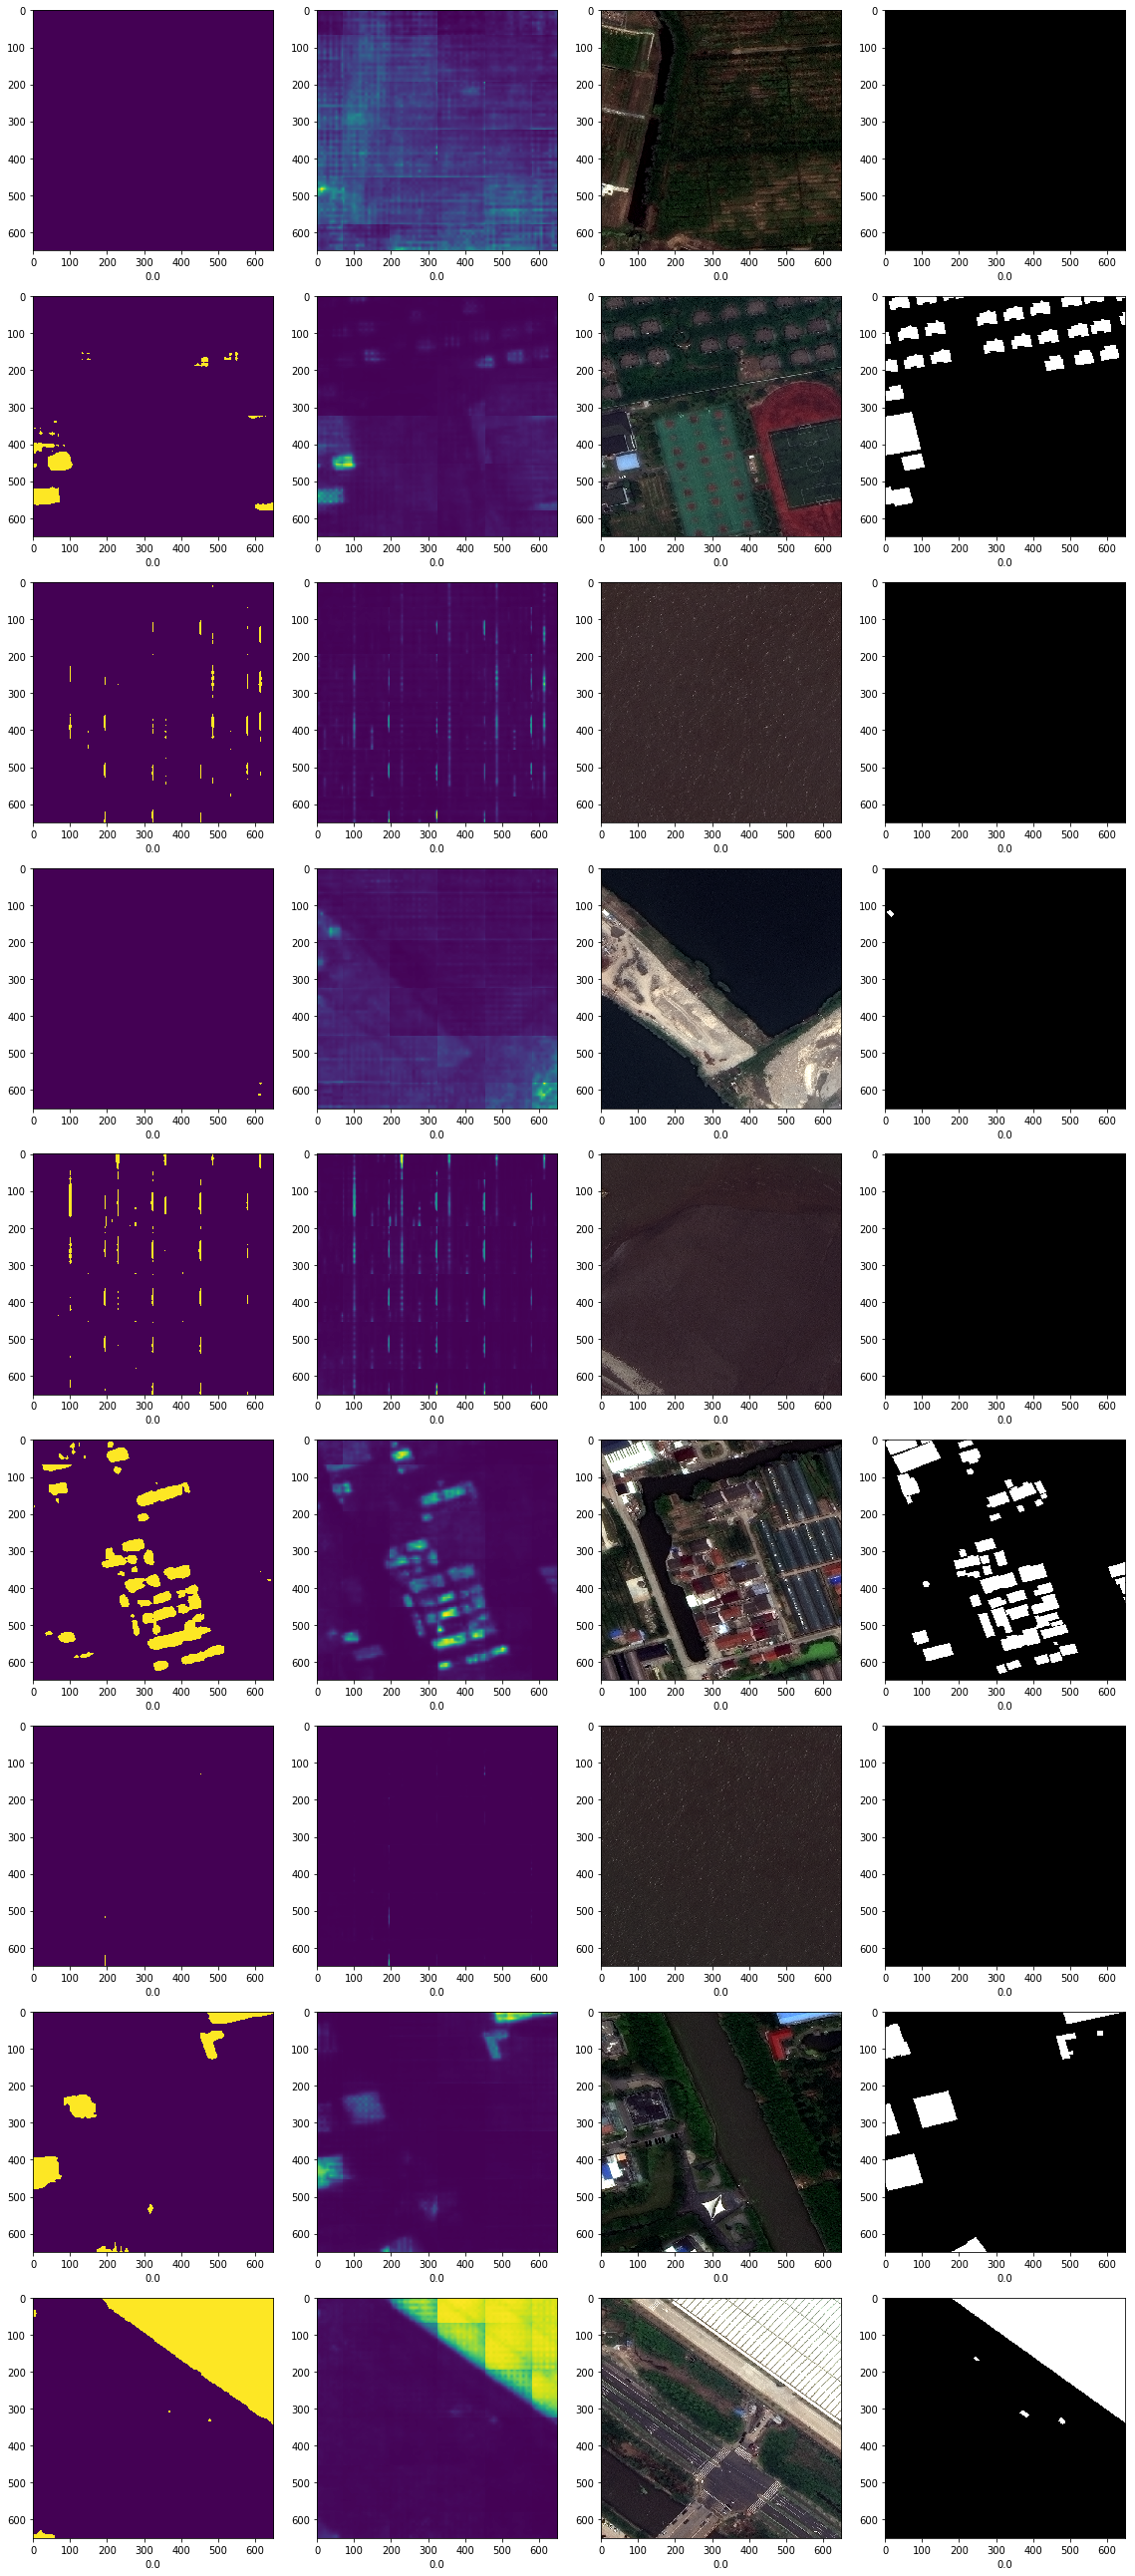

In [16]:
idx = 290
num_ims = 9
data_im = zip(slice_only[idx:idx + num_ims] > 0.1, slice_only[idx:idx + num_ims], val_x[idx:idx + num_ims], val_y[idx:idx + num_ims])
# data_im = [avg[idx:idx + 9]]
plot_ims(data_im, figsize=4)

[0.25262 0.25283 0.25288 0.25346 0.25391 0.25426 0.25451 0.25477 0.25537]


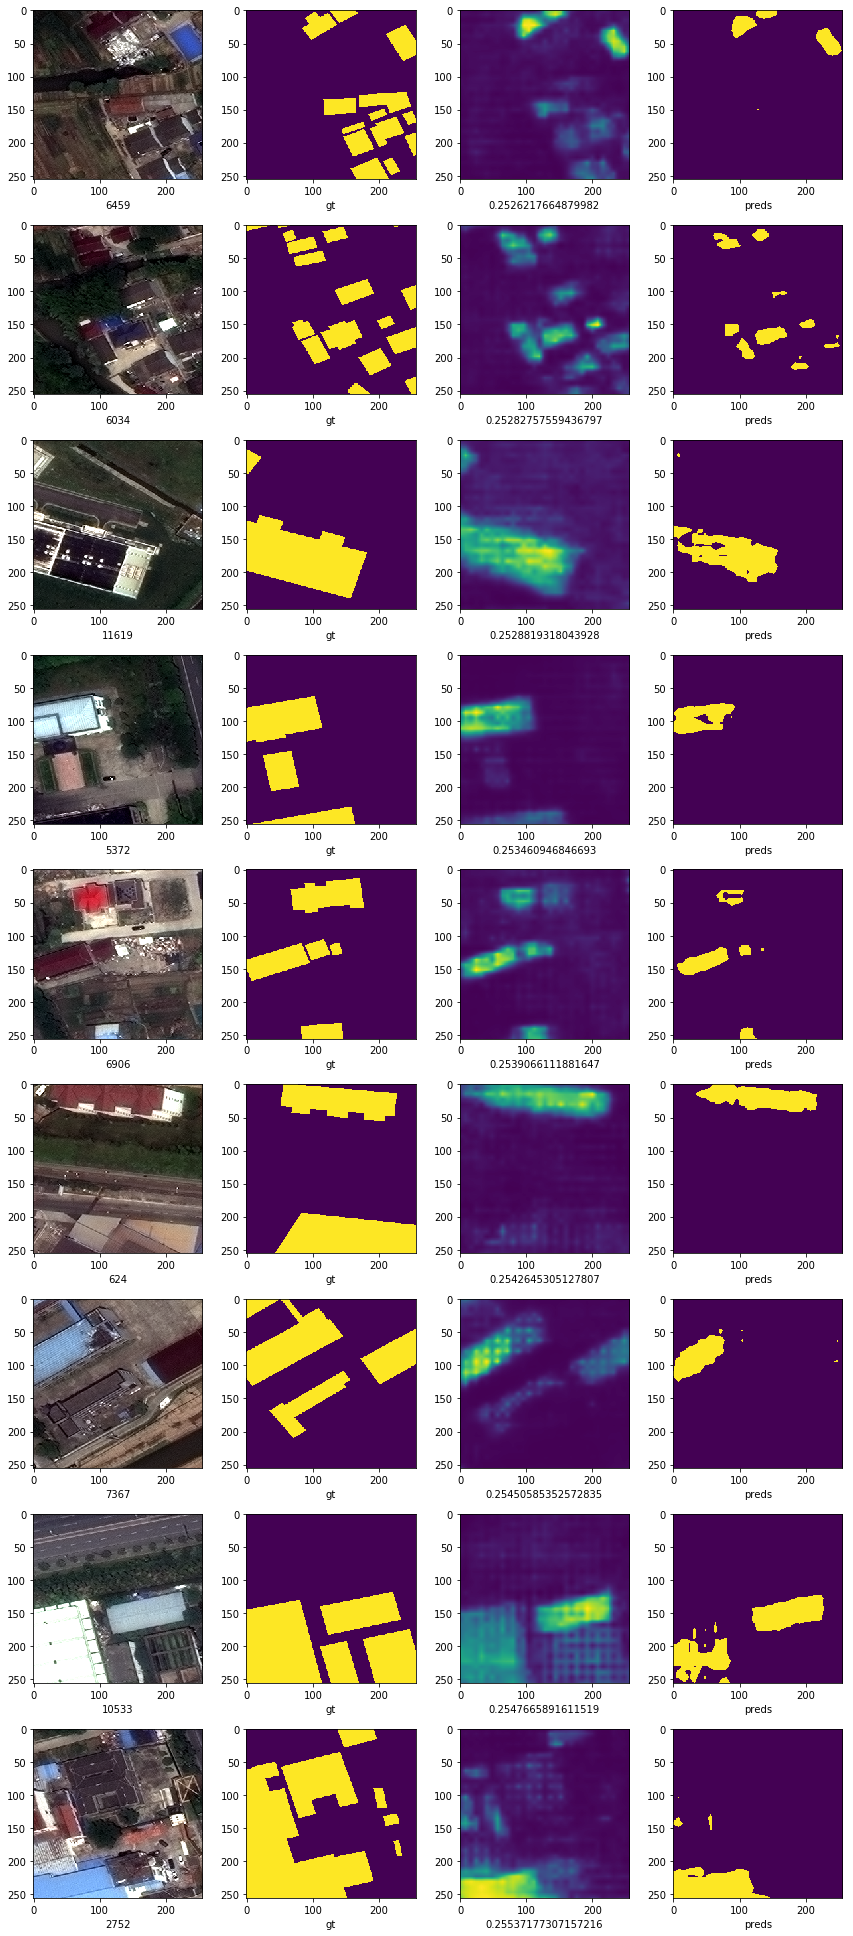

In [98]:
scores, idx = plot_worse_preds(x, y, preds, fscore, shift=6000,
                          scores=scores, is_best=0, thresh=0.4)

## testproc

In [ ]:
idx = 89
data_im = zip(preds_big[idx:idx + 9], x_big[idx:idx + 9], y_big[idx:idx + 9], )
plot_ims(data_im, figsize=4)

[0.49895 0.51091 0.51635 0.54636 0.54786 0.5628  0.58152 0.58209 0.58652]


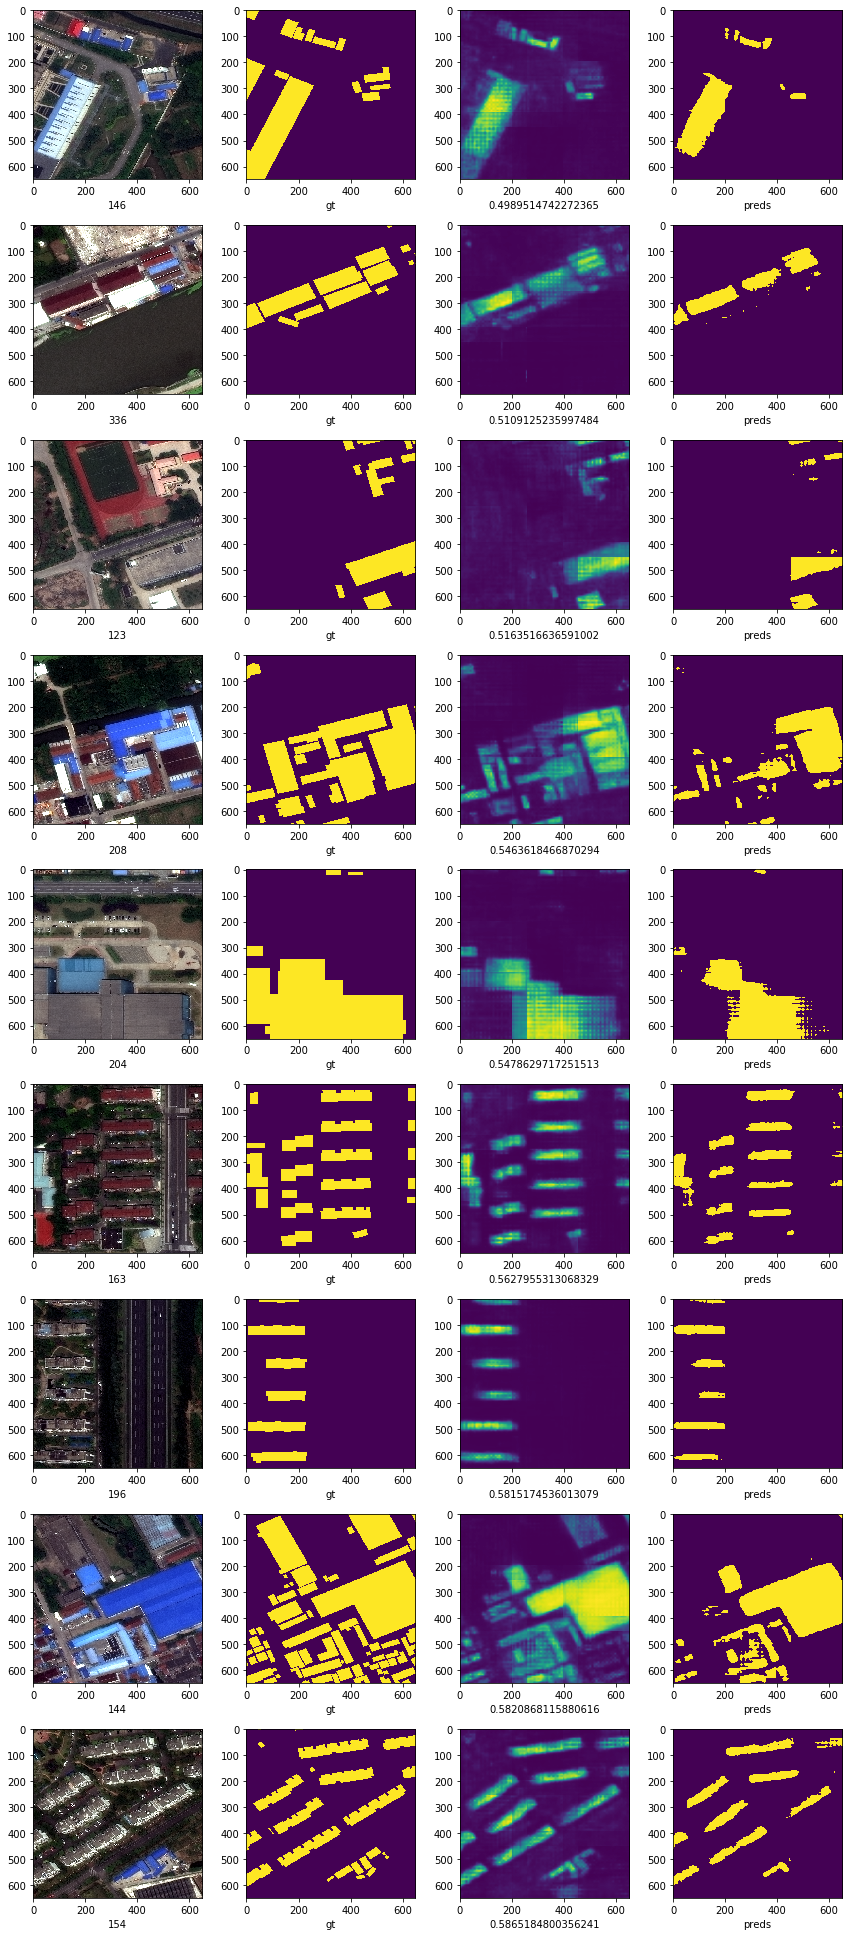

In [60]:
shift = 260
scores, idx = plot_worse_preds(x_big, y_big, preds_big, fscore, scores=scores, shift=shift, thresh=0.4)

In [53]:
%%time
threshs = np.linspace(0, 1, 20)
# preds_big, y_big = T(preds_big).float(), T(y_big).float()
with ThreadPoolExecutor(max_workers=8) as e:
    gen = list(e.map(partial(pr_np, preds_big, y_big), threshs))

CPU times: user 59 s, sys: 49.8 s, total: 1min 48s
Wall time: 10.8 s


In [88]:
np.save('gen_shanghai.npy', gen)

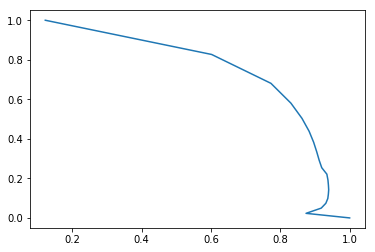

In [55]:
plt.plot(*zip(*gen))

In [56]:
distance = [o[0] - o[1] for o in score]

In [57]:
np.argmin(np.abs(distance)) / 20 

0.4

# After mean

In [ ]:
%%time
%run script 2 --num_gpus=1 --gpu_start=7 --bs=40 --pred --eval --num_slice 25 --model_name unet


Data finished loading: data/train/AOI_4_Shanghai_Train


0.4 0.164645
0.4222222222222222 0.169536
0.4444444444444445 0.174885
0.4666666666666667 0.179724
0.4888888888888889 0.184416
0.5111111111111111 0.190035
0.5333333333333333 0.195668


# Submission

In [1]:
%%time
%run script 2 --num_gpus=1 --gpu_start=5 --bs=40 --test --num_slice 25 --model_name unet

Data finished loading: data/train/AOI_4_Shanghai_Train



CPU times: user 10h 58min 14s, sys: 1h 6min 33s, total: 12h 4min 47s
Wall time: 33min 22s


In [ ]:
print('hi')